# Vectors

A vector is an essential concept in mathematics and physics. It's like an arrow with a specific length (magnitude) and direction. Imagine a straight arrow in space. That arrow is a vector.

Components of a Vector:

Magnitude: This is just a fancy word for the vector's length or size. Imagine measuring the length of the arrow from its tail to its tip.

Direction: Think of this as the way the arrow points. Does it go up, down, left, right, or at some angle?

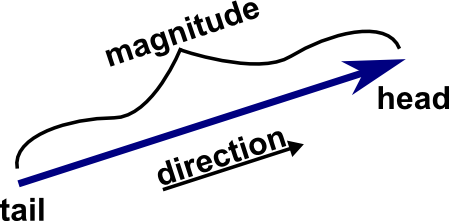

Vector Notation:
Mathematically, we write vectors like this: v = (x, y) for 2-d.

For 3-D, v = (x, y, z),

For N-D, v = (x, y, z, a,....)

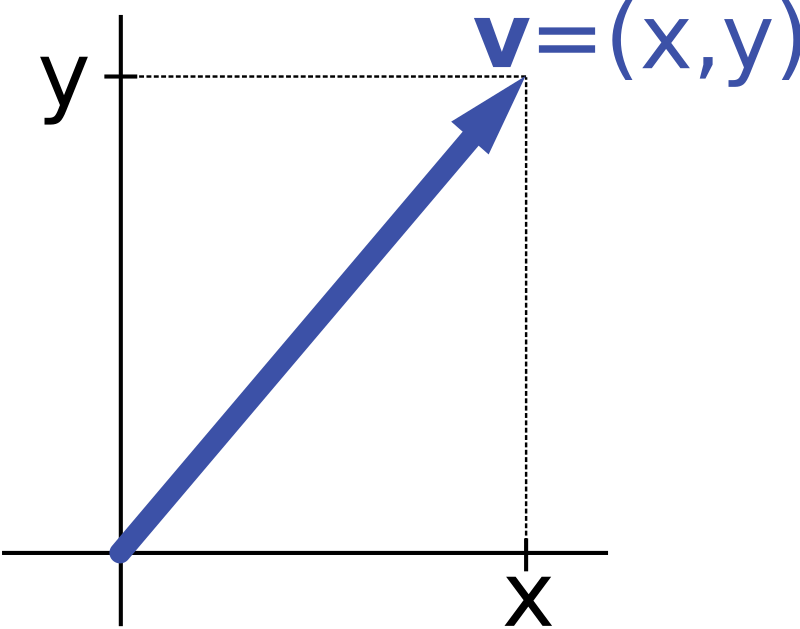

In most standard vector representations, the tail of the vector is considered as the origin (0, 0). This means that the coordinates of the vector's endpoint are relative to the origin.


The coordinate (2, 3) in coordinate system is represented as:

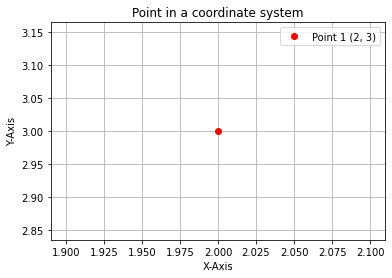

The above point (2, 3) in vector space will be represented by movement from origin. It means you move 2 units to the right (along the x-axis) and 3 units up (along the y-axis) from the origin (0, 0).


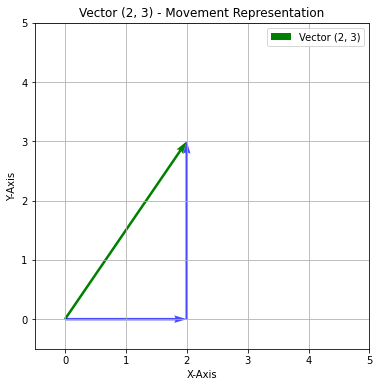

# Word Embedding 

Word embeddings are a way to represent words as vectors in a multi-dimensional space, typically in high-dimensional numerical form. These vectors capture semantic and syntactic information about words, allowing us to perform various natural language processing (NLP) tasks, such as text classification, sentiment analysis, machine translation, and more. 

king = [0.1 0.05 0.2 .... 150 such number] 

You can perform vector operations on word embeddings. 

king - men + women = queen


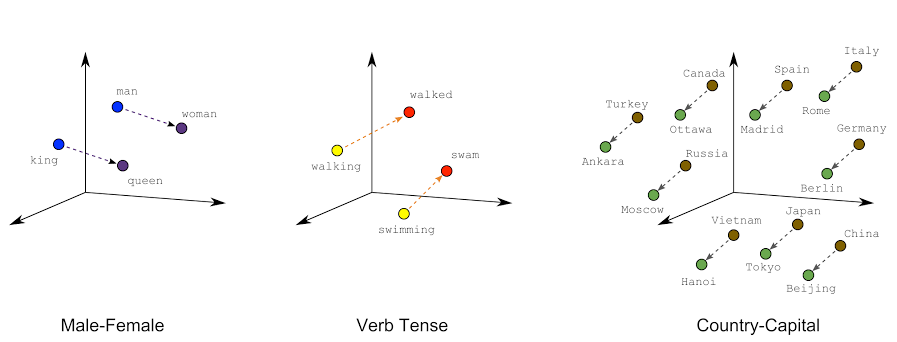

In [1]:
#Loading OpenAI key

with open("openai_key", "r") as file:
    openai_key = file.read()

In [2]:
import os
os.environ["OPENAI_KEY"] = openai_key

#Getting embedding from command line

!curl https://api.openai.com/v1/embeddings \
  -H "Content-Type: application/json" \
  -H "Authorization: Bearer $OPENAI_KEY" \
  -d '{    "input": "This product is really good",    "model": "text-embedding-ada-002"}'

{
  "object": "list",
  "data": [
    {
      "object": "embedding",
      "index": 0,
      "embedding": [
        0.006479884,
        0.012256625,
        -0.01229533,
        -0.02647431,
        -0.010624559,
        0.0026174346,
        -0.013101687,
        -0.03929861,
        0.0013409716,
        -0.029802952,
        0.009450503,
        0.017559228,
        -0.027996711,
        -0.0062250756,
        -0.011572834,
        0.0027367754,
        0.033209004,
        0.0032141386,
        -0.0049961875,
        -0.0036963401,
        -0.004231761,
        0.009515012,
        0.0026900067,
        -0.019958947,
        -0.0074700904,
        -0.0025158336,
        0.008940886,
        -0.02247478,
        0.0050123148,
        0.013127491,
        0.01101161,
        -0.0007406388,
        -0.02247478,
        -0.01931386,
        -0.009676283,
        0.0072959173,
        -0.031196337,
        -0.01976542,
        0.013598403,
        0.011224488,
        0.008869926,
    

In [3]:
import numpy as np
import urllib.request
import json
import math

# Define the endpoint URL
url = 'https://api.openai.com/v1/embeddings'

# Create a function to make the API request
def get_openai_embedding(prompt):
    headers = {
        'Authorization': f'Bearer {openai_key}',
        'Content-Type': 'application/json',
    }
    data = {
        "input": prompt,    
        "model": "text-embedding-ada-002"
    }
    
    # Encode the data and make the POST request
    data = json.dumps(data).encode('utf-8')
    req = urllib.request.Request(url, data=data, headers=headers, method='POST')
    
    try:
        response = urllib.request.urlopen(req)
        response_data = json.loads(response.read().decode('utf-8'))
        return np.array(response_data['data'][0]['embedding'])
    except urllib.error.HTTPError as e:
        print(f"HTTP Error: {e}")
        return None



In [4]:
embedding = get_openai_embedding("How are you")
embedding

array([-0.01601839, -0.00278705, -0.00439459, ...,  0.00317546,
        0.01289842, -0.00163133])

# Visualizing words

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
from sklearn.decomposition import PCA

def visualize_pca_2d(embeddings, words):
    pca_2d = PCA(n_components=2)
    embeddings_2d = pca_2d.fit_transform(embeddings)

    # Create a 2D scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o')
    for i, word in enumerate(words):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("2D Visualization of Word Embeddings")
    plt.grid(True)
    plt.show()

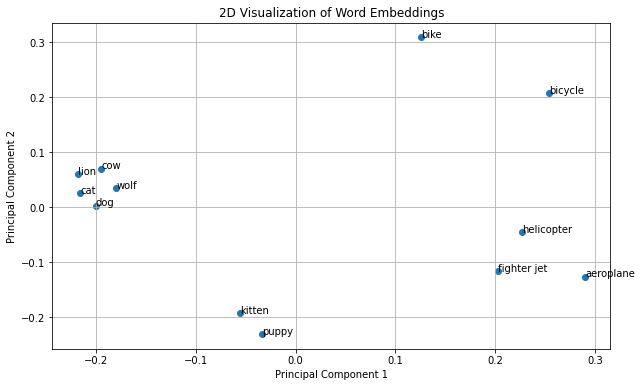

In [43]:
words = ['cat', 'dog', 'bike', 'kitten', 'puppy', 'bicycle', 'aeroplane', 'helicopter', 'cow', 'wolf', 'lion', 'fighter jet']
embeddings = []
for i in words:
    embeddings.append(get_openai_embedding(i))
visualize_pca_2d(embeddings, words)

# Pythagorean Theorem

In a right-angled triangle, the square of the length of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the lengths of the other two sides.

In mathematical terms, if we have a right-angled triangle with sides of lengths 'a' and 'b' and a hypotenuse of length 'c', the Pythagorean Theorem can be expressed as: ${c^2 = a^2 + b^2}$

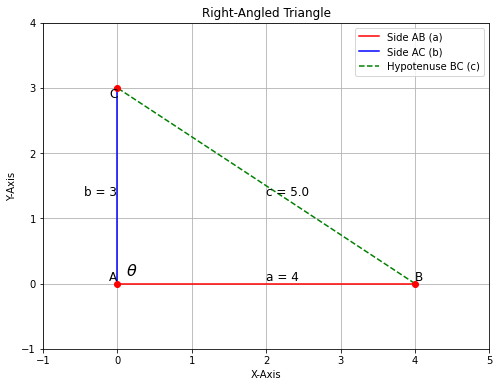

${c^2 = a^2 + b^2}$

${5^2 = 4^2 + 3^2}$

25 = 16 + 9

25 = 25

## Let's extend the theorem to calculating distance between any two points in 2 dimension:

### Step 1: Two Points - Define the Points
Imagine two points in a 2-D space. These points can represent anything from physical locations to abstract quantities.

In [8]:
point1 = (1, 2)
point2 = (4, 6)

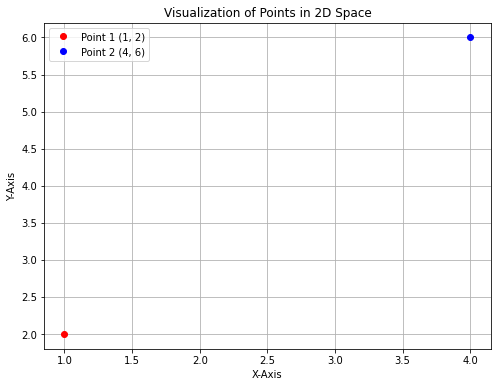

### Step 2: Connecting a Line - Calculate Differences and Hypotenuse
To measure the distance between these points, connect them with a straight line. This line represents the shortest path between the two points, equivalent to the hypotenuse of a right-angled triangle.

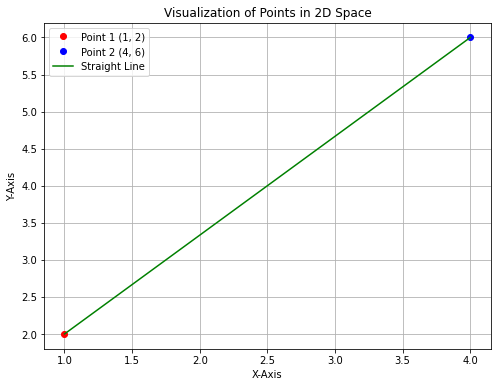

In [9]:
# Calculate the differences in coordinates
side1 = point2[0] - point1[0]
side2 = point2[1] - point1[1]
print(f"Length of side1 is {side1} units")
print(f"Length of side2 is {side2} units")

Length of side1 is 3 units
Length of side2 is 4 units


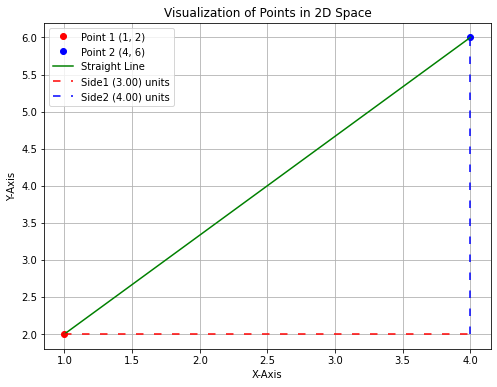

Apply pythogorean theorem to calculate length of the hypotenuse, i.e., distance between two points

In [10]:
hypotenuse_square = side1**2 + side2**2
distance_2d = math.sqrt(hypotenuse_square)
print(f"The length of the hypotenuse, i.e., distance between two points is {distance_2d} units")

The length of the hypotenuse, i.e., distance between two points is 5.0 units


So for two dimension, we can also represent the distance as:

point1 = (1, 2)

point2 = (4, 6)

distance = hypotenuse

distance = $\sqrt{hypotenuse^2}$

distance = $\sqrt{side1^2 + side2^2}$

distance = $\sqrt{(point2[0] - point1[0])^2 + (point2[1] - point1[1])^2}$


In [11]:
distance_2d = ((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)**0.5

print("Distance between 2D points:", distance_2d)

Distance between 2D points: 5.0


Now, let's represent them in terms of x and y:-

point1 = (1, 2)

point2 = (4, 6)

${x_2}$ = point2[0] = 4

${x_1}$ = point1[0] = 1

${y_2}$ = point2[1] = 6

${y_1}$ = point1[1] = 2

distance =$\sqrt{(x_2 – x_1)^2 + (y_2 – y_1)^2}$

distance =$\sqrt{(4 – 1)^2 + (6 – 2)^2}$

distance = $\sqrt{9 + 16}$

distance =$\sqrt{25}$

This is called euclidean distance. 

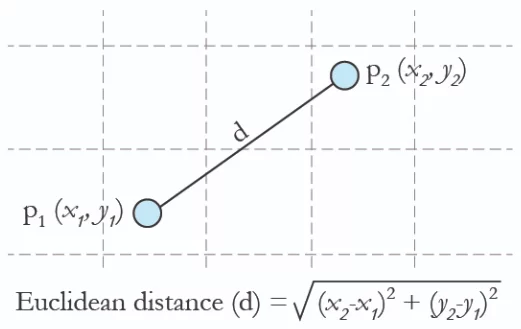

## Let's extend pythogorean theorem to 3-dimension

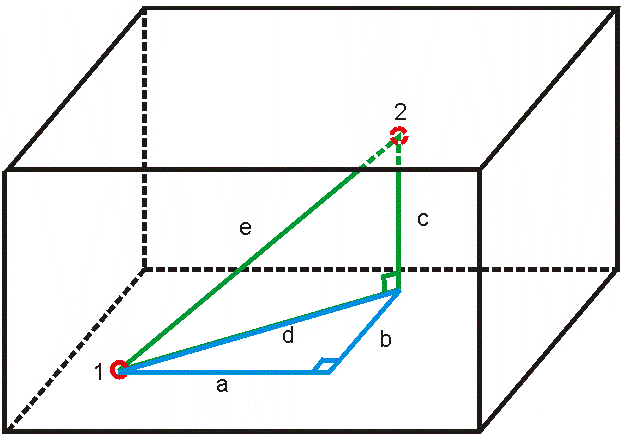

Distance 'e' would be the distance between point 1 & point 2. We could determine it using Pythagora's theorem as seen previously, but we first need to find the value of 'd' using values 'a' and 'b'.

For triangle abd

${d^2 = a^2 + b^2}$

For triangle ecd

${e^2 = d^2 + c^2}$

substituting ${d^2}$ in the above equation

${e^2 = a^2 + b^2 + c^2}$

e = $\sqrt{a^2+b^2 + c^2}$

In [12]:
# Define two 3D points
point1 = (1, 2, 3)
point2 = (4, 6, 8)

In [13]:
# Calculate the differences in coordinates
delta_x = point2[0] - point1[0]
delta_y = point2[1] - point1[1]
delta_z = point2[2] - point1[2]

distance_3d = (delta_x**2 + delta_y**2 + delta_z**2)**0.5
print("Distance between 3D points:", distance_3d)

Distance between 3D points: 7.0710678118654755


Again, we can represent the distance as:

point1 = (1, 2, 3)

point2 = (4, 6, 8)

distance = hypotenuse

distance = $\sqrt{hypotenuse^2}$

distance = $\sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}$

distance = $\sqrt{(point2[0] - point1[0])^2 + (point2[1] - point1[1])^2 + (point2[2] - point1[2])^2}$

In [14]:
distance_3d = ((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)**0.5

print("Distance between 3D points:", distance_3d)

Distance between 3D points: 7.0710678118654755


So euclidean distance for 3-D becomes as:

distance =$\sqrt{(x_2 – x_1)^2 + (y_2 – y_1)^2 + (z_2 – z_1)^2}$

## Let's extend it to n-dimension

In [15]:
# Calculate the Euclidean distance
def calculate_distance(point1, point2):
    distance_nd = sum((x - y) ** 2 for x, y in zip(point2, point1))**0.5
    return distance_nd

In [16]:
point1 = (1, 2, 3, 4, 7, 4)
point2 = (4, 6, 8, 10, 8, 6)
calculate_distance(point1, point2)

9.539392014169456

So, Euclidean distance for n-d becomes as

distance =$\sqrt{(x_2 – x_1)^2 + (y_2 – y_1)^2 + (z_2 – z_1)^2 + (a_2 – a_1)^2 + ............}$

where x, y, z, a ....., each represent a dimension/axis.

Or we can say that,

For two points p and q in n-dimension, 

d(p, q) =$\sqrt{(q_1 – p_1)^2 + (q_2 – p_2)^2 + (q_3 – p_3)^2 + (q_4 – p_4)^2 + ............}$

which comes as,

distance =$\sqrt{\sum_{i=1}^{n} (q_i - p_i)^2 }$

where i represents a dimension and n total number of dimensions.

## Let's use calculate_distance() to calculate distance between two embeddings

In [17]:
cat = get_openai_embedding('cat')
dog = get_openai_embedding('dog')
car = get_openai_embedding('car')
bike = get_openai_embedding('bike')

In [18]:
# Calculate distances between embeddings
distance_cat_dog = calculate_distance(cat, dog)
distance_cat_car = calculate_distance(cat, car)
distance_cat_bike = calculate_distance(cat, bike)
distance_bike_car = calculate_distance(bike, car)
distance_bike_dog = calculate_distance(bike, dog)

# Display distances
print(f"Distance between 'cat' and 'dog': {distance_cat_dog:.2f}")
print(f"Distance between 'cat' and 'car': {distance_cat_car:.2f}")
print(f"Distance between 'cat' and 'bike': {distance_cat_bike:.2f}")
print(f"Distance between 'bike' and 'car': {distance_bike_car:.2f}")
print(f"Distance between 'bike' and 'dog': {distance_bike_dog:.2f}")

# Compare distances
if distance_cat_dog < distance_cat_car and distance_cat_dog < distance_cat_bike:
    print("'cat' is closer to 'dog' than to 'car' or 'bike'.")

if distance_bike_car < distance_bike_dog and distance_bike_car < distance_cat_bike:
    print("'bike' is closer to 'car' than to 'dog' or 'cat'.")

Distance between 'cat' and 'dog': 0.52
Distance between 'cat' and 'car': 0.56
Distance between 'cat' and 'bike': 0.61
Distance between 'bike' and 'car': 0.54
Distance between 'bike' and 'dog': 0.57
'cat' is closer to 'dog' than to 'car' or 'bike'.
'bike' is closer to 'car' than to 'dog' or 'cat'.


# Sentiment Analysis

In [19]:
embeddings_good_review = get_openai_embedding('The product is amazing')
embeddings_bad_review = get_openai_embedding('The product is not good')
embd_positive = get_openai_embedding('positive')
embd_neg = get_openai_embedding('negative')

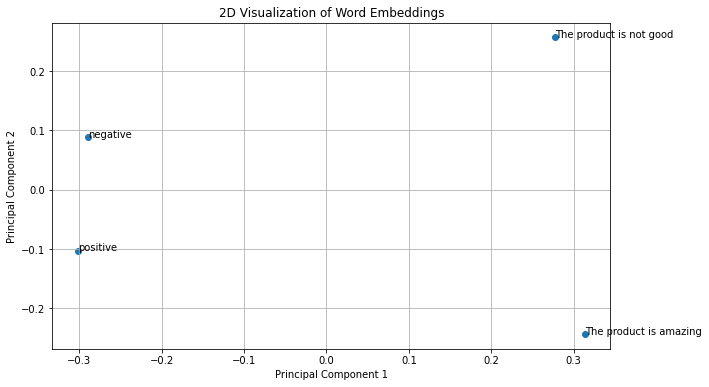

In [20]:
sent_embeddings = np.array([embeddings_good_review, embeddings_bad_review, embd_positive, embd_neg])
visualize_pca_2d(sent_embeddings, words = ['The product is amazing', 'The product is not good',
                                              'positive', 'negative'])

In [21]:
calculate_distance(embeddings_good_review, embd_positive)

0.6663293078646436

In [22]:
calculate_distance(embeddings_bad_review, embd_neg)

0.6326785842898347

In [23]:
calculate_distance(embeddings_bad_review, embd_positive), calculate_distance(embeddings_bad_review, embd_neg)

(0.6871655141231023, 0.6326785842898347)

In [24]:
def is_positive(review):
    embed_review = get_openai_embedding(review)
    dist_pos = calculate_distance(embed_review, embd_positive)
    dist_neg = calculate_distance(embed_review, embd_neg)
    if dist_pos < dist_neg:
        print("It is a positive review")
        return True
    else:
        print("It is a negative review")
        return False

In [25]:
is_positive("Camera quality is too worst. Don't buy this if you want good photos. We can get this quality pictures with 5000 rupees android phone. I am totally disappointed because I expected range of iPhone camera quality but not this.. Waste of money.")

It is a negative review


False

In [26]:
sum(embd_positive*embd_positive)

0.9999999589647395

In [27]:
sum(embd_neg*embd_neg)

1.0000000130911129

In [28]:
is_positive("Worth to buy it. If you are managed money buy then buy it it never feels you waste of money. Performance. Hand in feel. Camera quality at flagship level")

It is a positive review


True

In [29]:
is_positive("At first it seemed like a great product but my expected were changed completed.")

It is a negative review


False

In [30]:
is_positive("At first, it seemed like a bad product but it met my expectations.")

It is a positive review


True

## Dot product between two vectors

The dot product, also known as the scalar product, is a mathematical operation between two vectors. Given two vectors A and B in a multi-dimensional space, the dot product is calculated by multiplying their corresponding components and then summing up those products. Mathematically, the dot product of two vectors A and B is represented as A · B and is calculated as follows:

A = (A1, A2, A3, ......, An)

B = (B1, B2, B3, ......, Bn

A · B = A1 * B1 + A2 * B2 + A3 * B3 + ... + An * Bn

So suppose two vectors are

A = (1,2,3)

B = (4,5,6)

A.B = (A[0] * B[0]) + (A[1] * B[1]) + (A[2] * B[2])

A.B = (1 * 4) + (2 * 5) + (3 * 6)

A.B = 32

### What the Dot Product Represents?

The dot product represents the similarity or alignment between those vectors. It provides a way to quantify how much two vectors point in the same direction, and it's often used to determine the similarity or dissimilarity between vectors in various contexts.

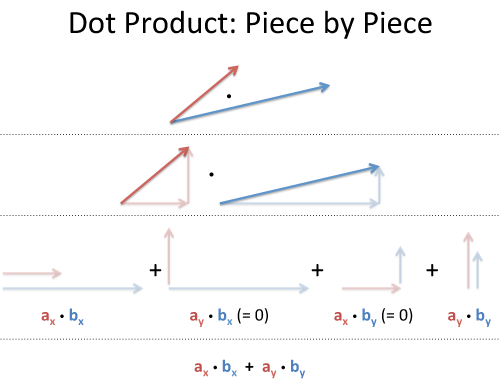

In [31]:
np.dot([0, 1], [1,0])

0

In [32]:
def is_positive2(review):
    embed_review = get_openai_embedding(review)
    dist_pos = np.dot(embed_review, embd_positive)
    dist_neg = np.dot(embed_review, embd_neg)
    if dist_pos > dist_neg:
        print("It is a positive review")
        return True
    else:
        print("It is a negative review")
        return False

In [33]:
is_positive2("ye product kaafi achha hai")

It is a positive review


True

In [34]:
is_positive2("ye product kaafi kharaab hai")

It is a negative review


False

Now let's visualize both vectors and their dot product projection

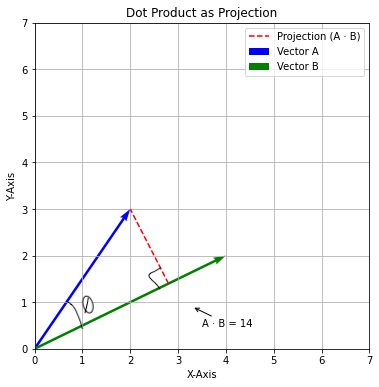

Now, we know that cos(θ) = adjacent side / hypotenuse

In the context of the dot product, the adjacent side is (A · B), and the hypotenuse is (|A| * |B|). Therefore, we have:

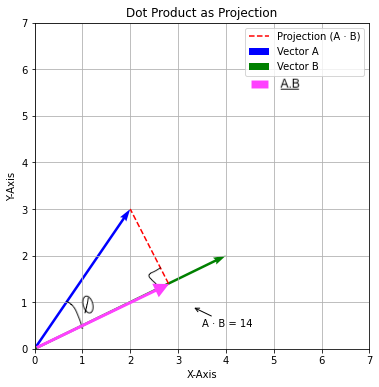

That makes cos θ = (A · B) / (|A| * |B|)

This is called as cosine similarity

If the vectors are exactly the same, the cosine similarity is 1 (cos 0° = 1).

If the vectors are orthogonal (perpendicular), the cosine similarity is 0 (cos 90° = 0).

If the vectors are in opposite directions, the cosine similarity is -1 (cos 180° = -1).

Values in between indicate different degrees of similarity.

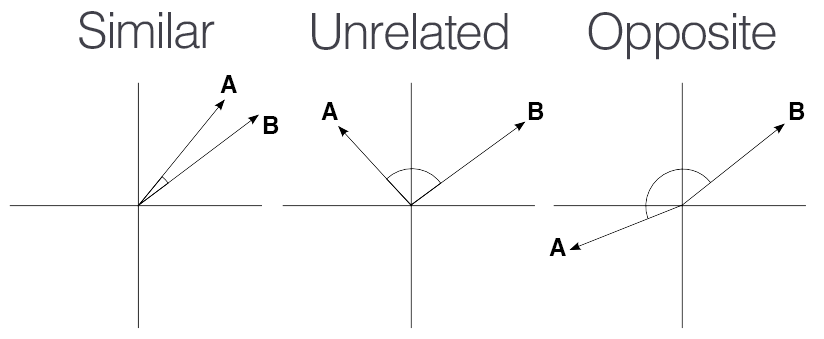

In [35]:
def cosine_similarity(A, B):
    dot_product = np.dot(A, B)

    # Calculate the magnitudes |A| and |B|
    magnitude_A = np.linalg.norm(A)
    magnitude_B = np.linalg.norm(B)

    # Calculate the cosine similarity
    cosine_similarity = dot_product / (magnitude_A * magnitude_B)
    return cosine_similarity

In [36]:
def is_positive3(review):
    embed_review = get_openai_embedding(review)
    dist_pos = cosine_similarity(embed_review, embd_positive)
    dist_neg = cosine_similarity(embed_review, embd_neg)
    if dist_pos > dist_neg:
        print("It is a positive review")
        return True
    else:
        print("It is a negative review")
        return False

In [37]:
is_positive3("Useful product")

It is a positive review


True

In [38]:
is_positive3("Useless product")

It is a negative review


False

## Comparison of similarity metrics

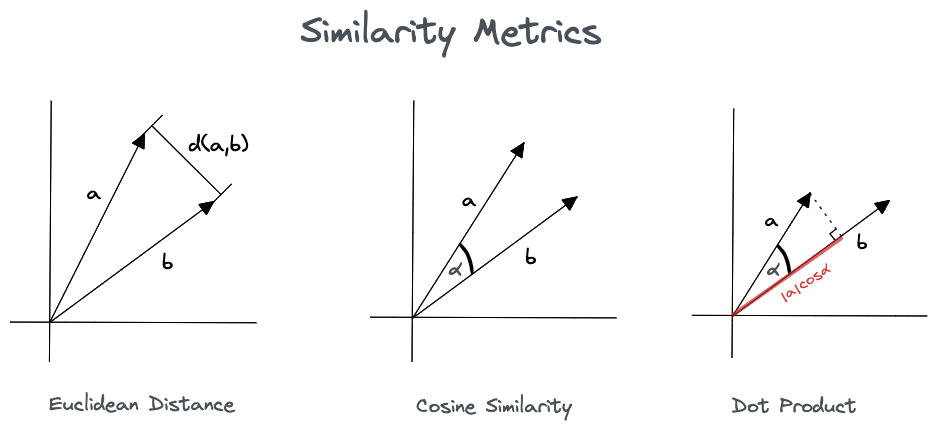